# Packages and plot functions

In [ ]:
import itertools

import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.gofplots import qqplot

In [ ]:
np.random.seed(42)

plot_params = {'legend.fontsize': 10,
               'figure.figsize': (8, 4),
               'axes.labelsize':  7.5,
               'axes.titlesize':  10,
               'xtick.labelsize': 7.5,
               'ytick.labelsize': 7.5,
               'figure.dpi': 300}

plt.style.use('seaborn-v0_8')

plt.rcParams.update(plot_params)

color_dark_blue = [1/255, 62/255, 125/255]
color_light_blue = [6/255, 143/255, 203/255]
purple = [102/255, 51/255, 153/255]

colors = [color_dark_blue, color_light_blue, purple]

color_line = list(itertools.product(['-', ':', '--', ':' '-', ':'], colors))

In [ ]:
def TimeSeriesPlot(y, lags=None, style='seaborn-v0_8-muted', y2=None):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure()
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax, color=color_dark_blue)
        ts_ax.set_title('Time Series Analysis Plots')
        sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05, color=color_dark_blue)
        sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05, color=color_dark_blue)

        if y2 is not None:
              if not isinstance(y2, pd.Series):
                  y2 = pd.Series(y2)
              y2.plot(ax=ts_ax, color=color_light_blue)
              sm.graphics.tsa.plot_acf(y2, lags=lags, ax=acf_ax, alpha=0.05, color=color_light_blue)
              sm.graphics.tsa.plot_pacf(y2, lags=lags, ax=pacf_ax, alpha=0.05, color=color_light_blue)

        plt.tight_layout()
    return


def HistQQplot(ret):

    plt.figure()
    sns.histplot(ret, bins=50, color=color_dark_blue, stat='density')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(ret), np.std(ret))
    plt.plot(x, p, color='r', linestyle='dashed', linewidth=3, label='Gaussian')
    plt.xlabel('SPX Return')
    plt.ylabel('Frequency')
    plt.legend()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    qq = qqplot(ret, line='s', ax=ax, markerfacecolor=color_dark_blue, fit=True)
    sm.qqline(qq.axes[0], line='45', fmt='r--')
    plt.xlabel('Theoretical Quantile')
    plt.ylabel('Sample Quantile')
    plt.xlim([-4,4]);

    return

# Real Stock Price Data

Index values for the Nikkei exchange

In [ ]:
df = pd.read_csv('stock_prices.csv', index_col=0)['US: S&P 500']
#df = pd.read_csv('stock_prices.csv', index_col=0)['Japan: Nikkei 225']
#df = pd.read_csv('stock_prices.csv', index_col=0)['Germany: DAX']
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

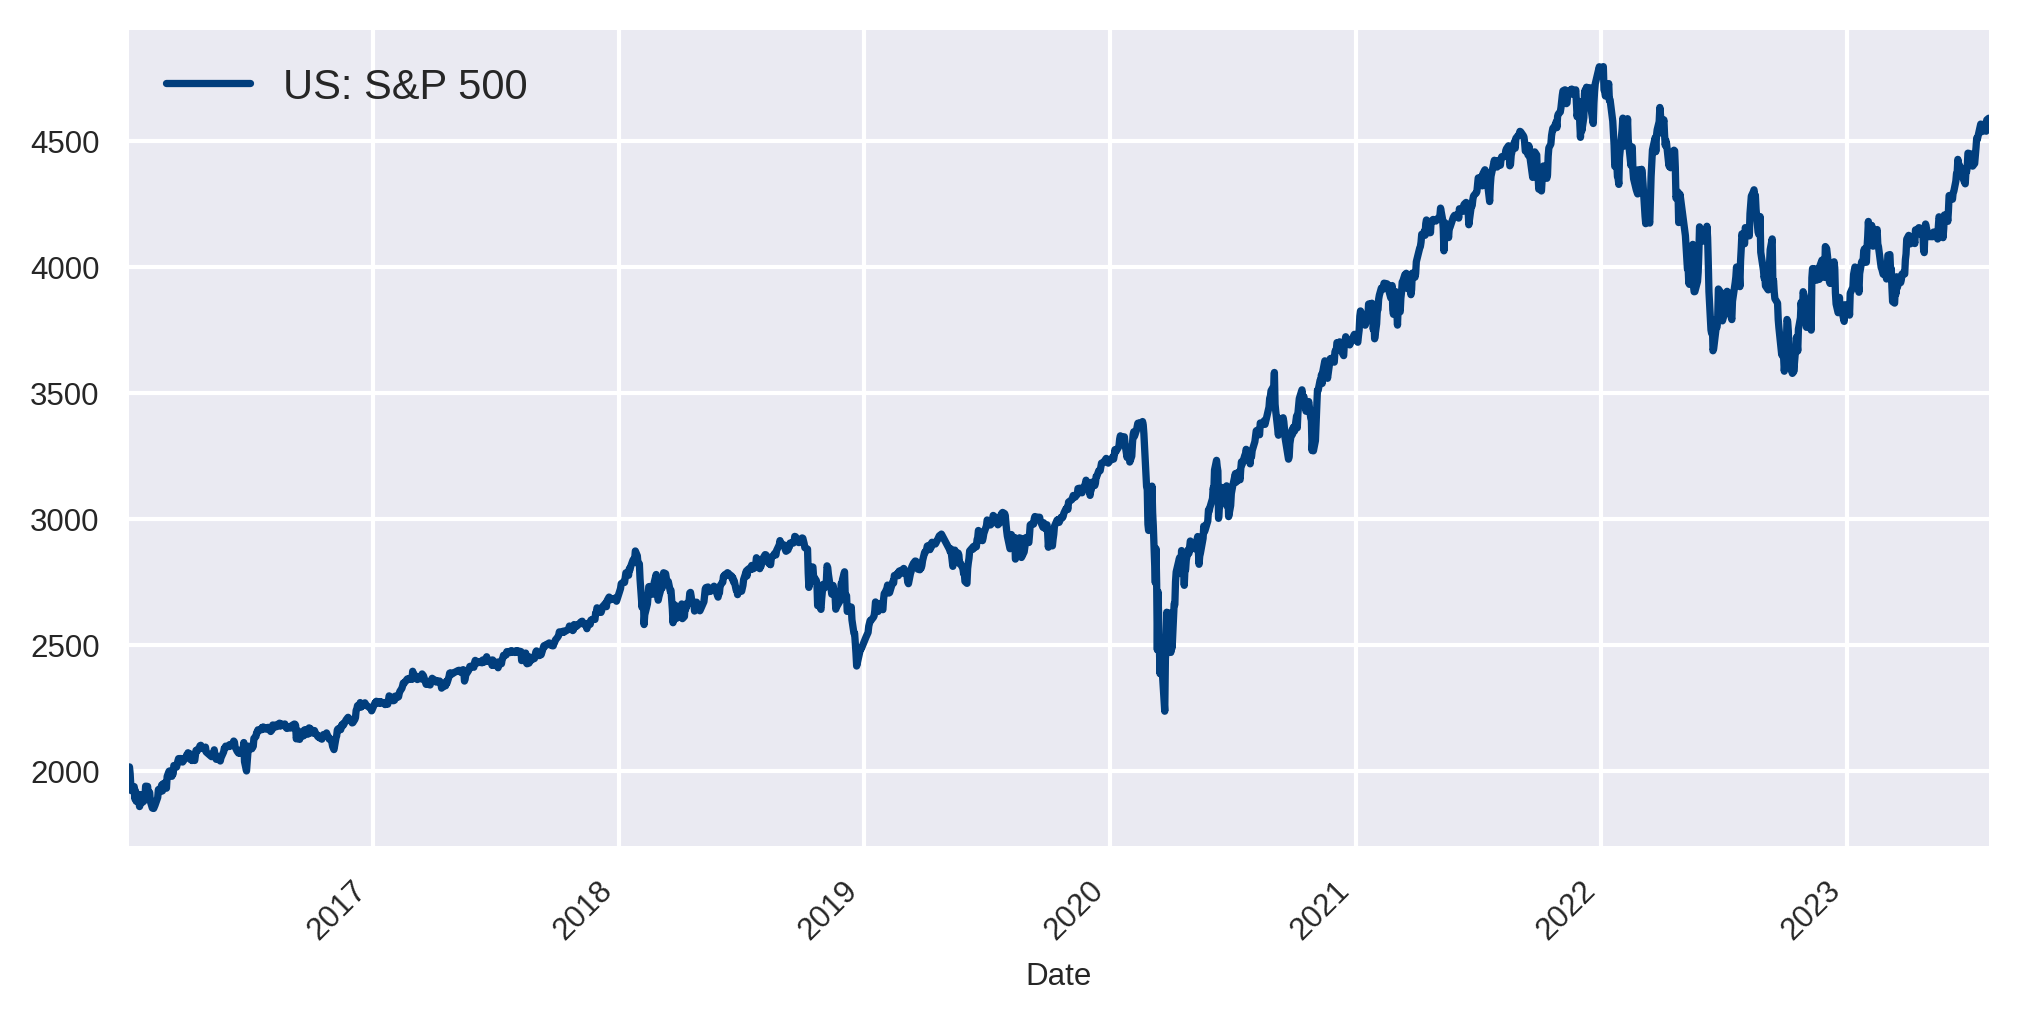

In [ ]:
df.plot(color=color_line[0][1], linestyle=color_line[0][0])
plt.legend(fontsize="10")
plt.xticks(rotation=45, ha='right')
plt.xlim([df.index[0], df.index[-1]]);

To compare different time series it is useful to create equivalent time series but all starting at $X_0=1$, we consider the following:

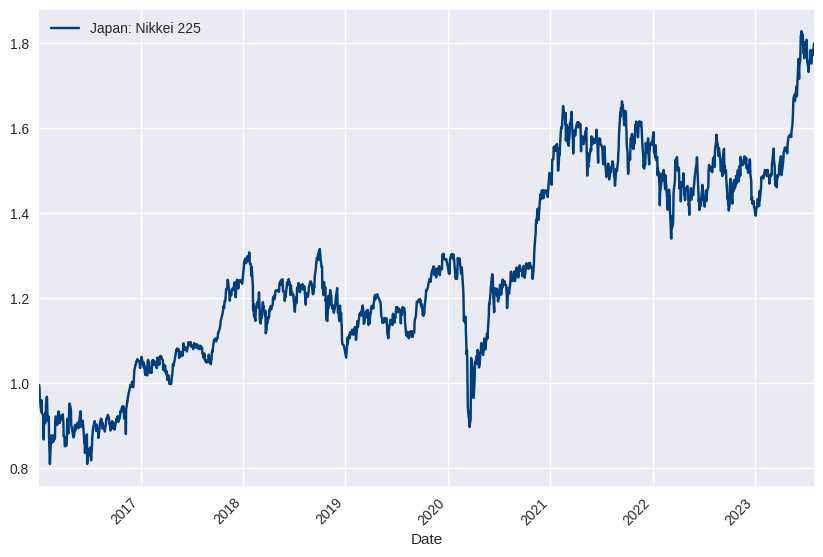

In [ ]:
(df.pct_change()+1).cumprod().plot(figsize=(10, 7), color=color_line[0][1], linestyle=color_line[0][0])
plt.legend(fontsize="10")
plt.xticks(rotation=45, ha='right')
plt.xlim([df.index[0], df.index[-1]]);

We then analyze the increments $\Delta X_t = X_t - X_{t-1}$ of this time series:

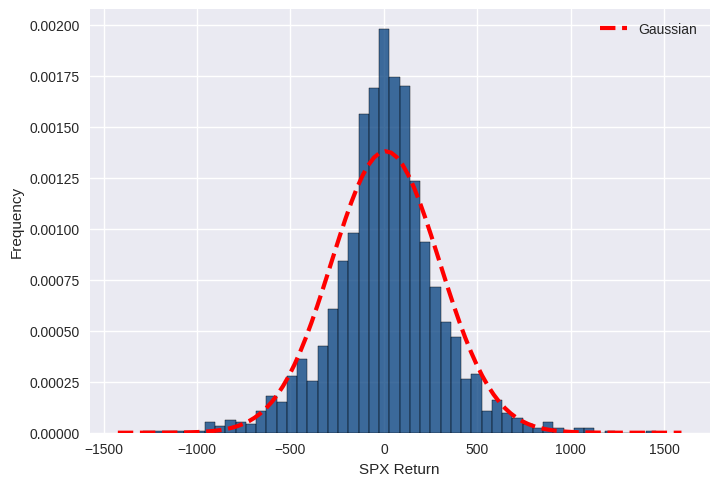

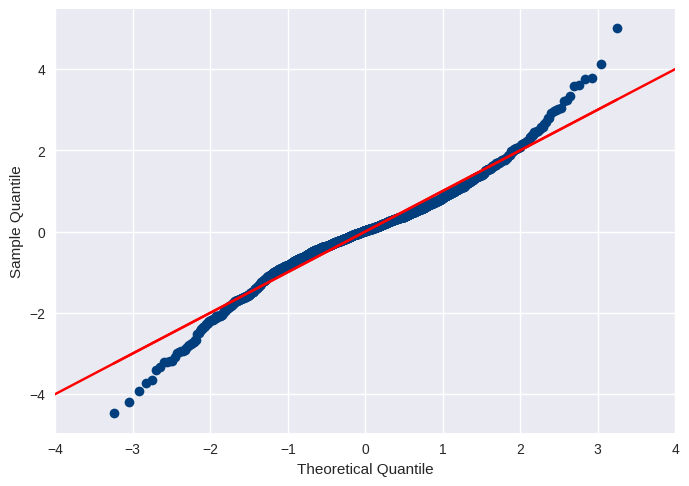

In [ ]:
HistQQplot(df.diff().dropna())

## Question 1

Download the data for the DAX (German stock index, ticker '^GDAXI'), plot the time series equivalent to it starting at $X_0=1$ and analyze the distribution of the **log return** of the price

# Stationary Processes - White Noise, ACF, PACF

## White Noise

In [ ]:
w = np.random.normal(size=1000)

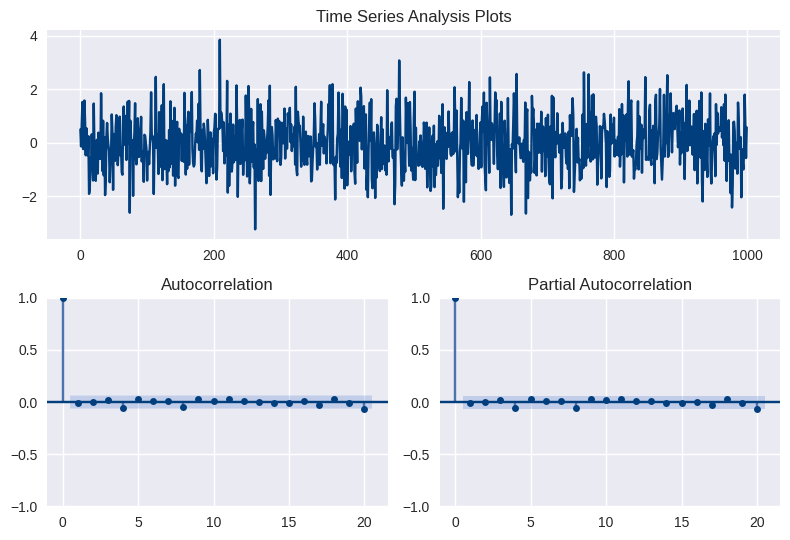

In [ ]:
TimeSeriesPlot(w, lags=20)

## Random Walk

In [ ]:
x = np.random.normal(size=1000)
w = np.random.normal(size=1000)
for t in range(1000):
    x[t] = x[t-1] + w[t]

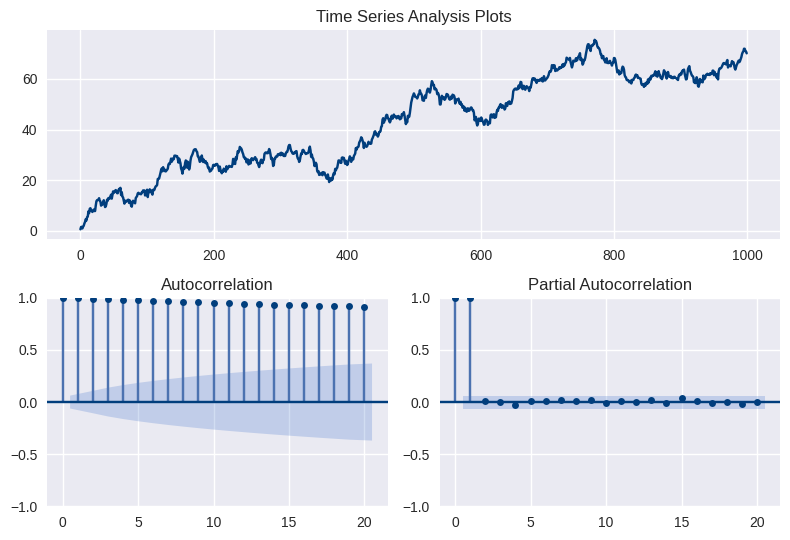

In [ ]:
TimeSeriesPlot(x, lags=20)

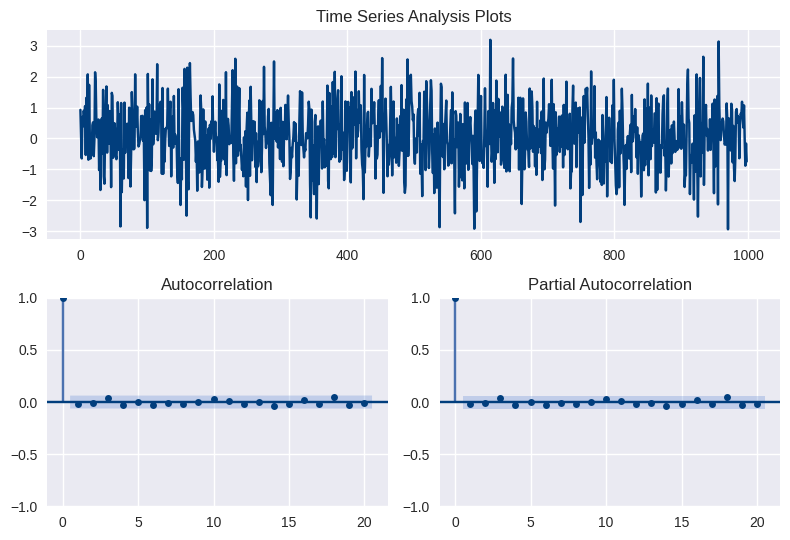

In [ ]:
TimeSeriesPlot(np.diff(x), lags=20)

## Nikkei

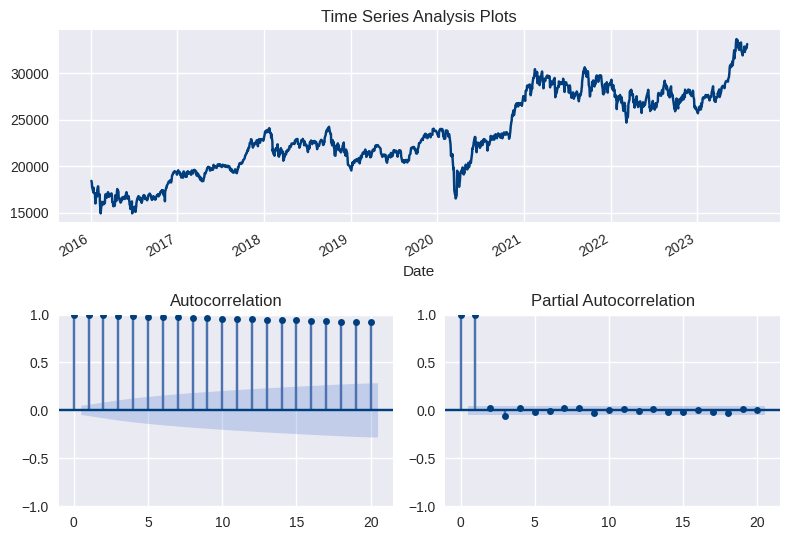

In [ ]:
TimeSeriesPlot(df, lags=20)

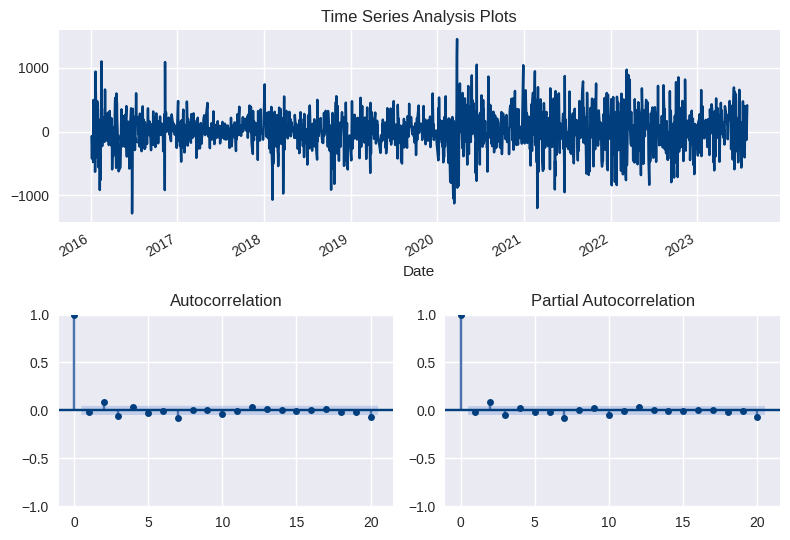

In [ ]:
TimeSeriesPlot(df.diff().dropna(), lags=20)

## **Question 2**

Plot the ACF and PACF for the the log return of the DAX and discuss the results. Is the this time series consistent with the white noise? And the Random Walk?

# AR and MA models

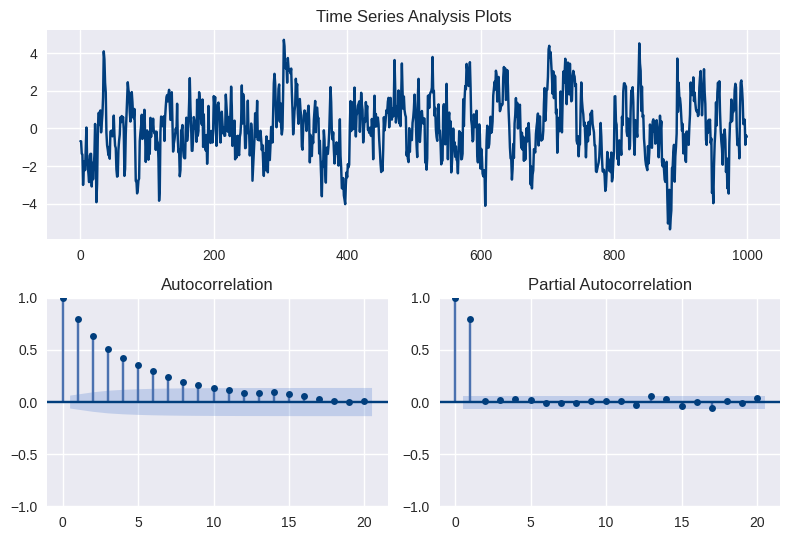

In [ ]:
w = np.random.normal(size=1000)
x = np.zeros_like(w)
for t in range(1000):
    x[t] = 0.8*x[t-1] + w[t]

TimeSeriesPlot(x, lags=20)

b+ = 2.0, b- = 0.5


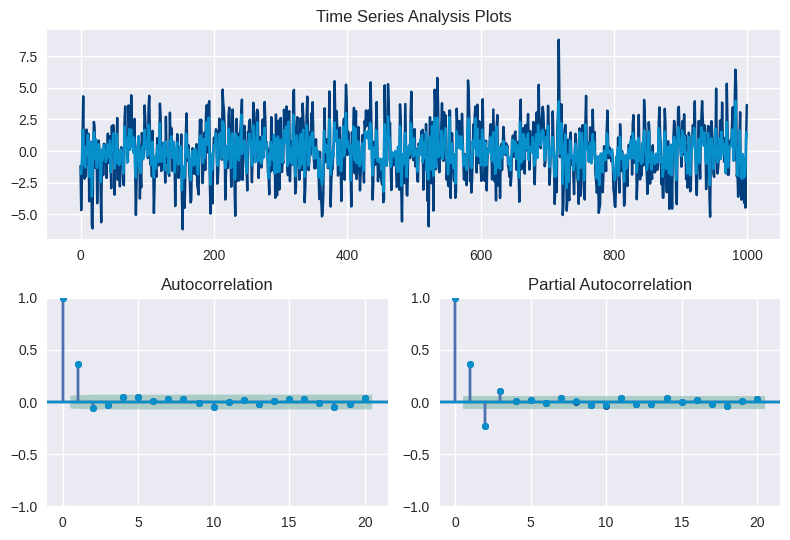

In [ ]:
c = 0.4
b_plus = (1 + np.sqrt(1 - 4*c**2))/(2*c)
b_minus = (1 - np.sqrt(1 - 4*c**2))/(2*c)

print("b+ = {}, b- = {}".format(np.round(b_plus,2),np.round(b_minus,2)))

w = np.random.normal(size=1000)
x_plus = np.zeros_like(w)
x_minus = np.zeros_like(w)

for t in range(1000):
    x_plus[t] = b_plus*w[t-1] + w[t]
    x_minus[t] = b_minus*w[t-1] + w[t]

TimeSeriesPlot(y=x_plus, lags=20, y2=x_minus)

## **Question 3**

Simulate an AR(2) with parameters $a_0 = 1.0$, $a_1 = 0.2$ and $a_2 = 0.5$. Also, simulate an MA(2) with $b_0 = 0.2$, $b_1 = 0.5$ and $b_2 = 0.9$

In [ ]:
np.mean(x)

3.383471098184451

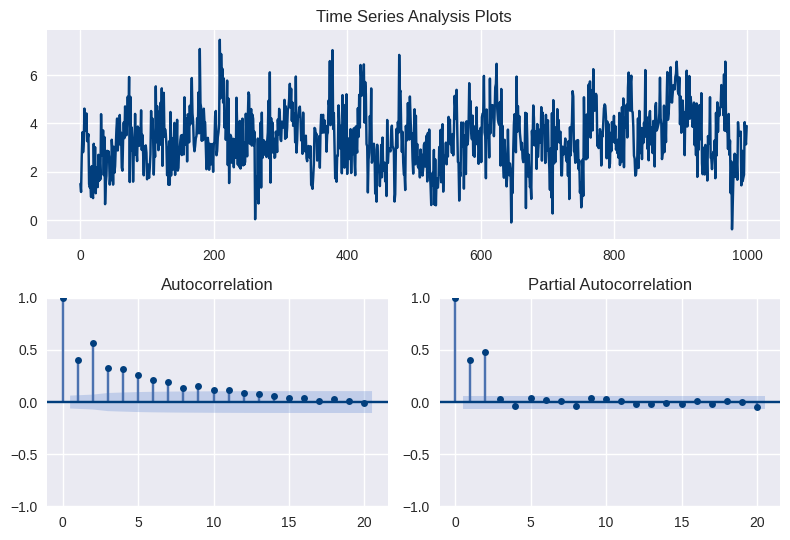

In [ ]:
w = np.random.normal(size=1000)
x = np.zeros_like(w)
for t in range(1000):
    x[t] = 1.0 + 0.2*x[t-1] + 0.5*x[t-2] + w[t]

TimeSeriesPlot(x, lags=20)

# ARMA Model Selection for the S&P 500

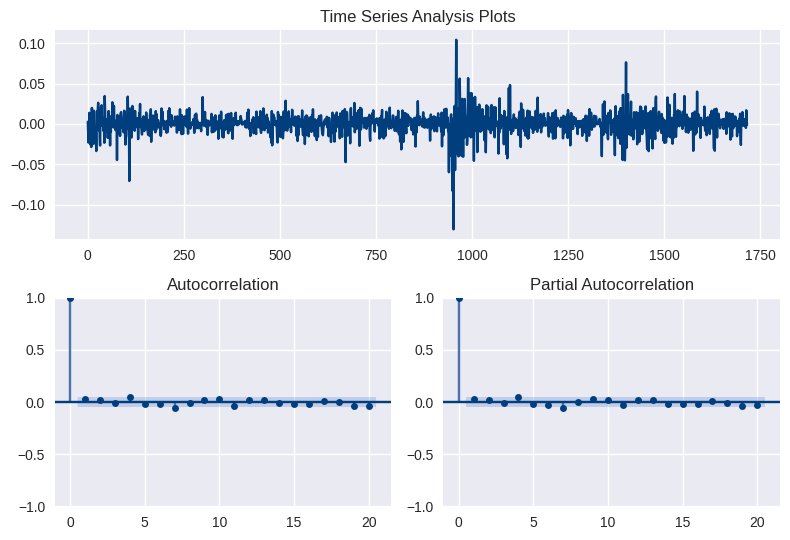

In [ ]:
TimeSeriesPlot(np.diff(np.log(df)), lags=20)

In [ ]:
arma_11 = ARIMA(np.diff(np.log(df)), order=(1, 0, 1)).fit()
print(arma_11.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1717
Model:                 ARIMA(1, 0, 1)   Log Likelihood                5029.084
Date:                Thu, 16 Nov 2023   AIC                         -10050.168
Time:                        10:03:11   BIC                         -10028.374
Sample:                             0   HQIC                        -10042.104
                               - 1717                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.794      0.427      -0.000       0.001
ar.L1          0.2828      0.423      0.669      0.504      -0.546       1.111
ma.L1         -0.2547      0.427     -0.597      0.5

In [ ]:
arma_22 = ARIMA(np.diff(np.log(df)), order=(2, 0, 2)).fit()
print(arma_22.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1717
Model:                 ARIMA(2, 0, 2)   Log Likelihood                5029.839
Date:                Thu, 16 Nov 2023   AIC                         -10047.678
Time:                        10:03:23   BIC                         -10014.988
Sample:                             0   HQIC                        -10035.582
                               - 1717                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.799      0.424      -0.000       0.001
ar.L1         -0.5958      0.421     -1.414      0.157      -1.421       0.230
ar.L2         -0.1508      0.416     -0.363      0.7

In [ ]:
arma_55 = ARIMA(np.diff(np.log(df)), order=(5, 0, 5)).fit()
print(arma_55.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1717
Model:                 ARIMA(5, 0, 5)   Log Likelihood                5036.533
Date:                Thu, 16 Nov 2023   AIC                         -10049.066
Time:                        10:03:41   BIC                          -9983.686
Sample:                             0   HQIC                        -10024.874
                               - 1717                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.762      0.446      -0.000       0.001
ar.L1          0.7691      0.206      3.736      0.000       0.366       1.173
ar.L2         -0.5574      0.150     -3.720      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


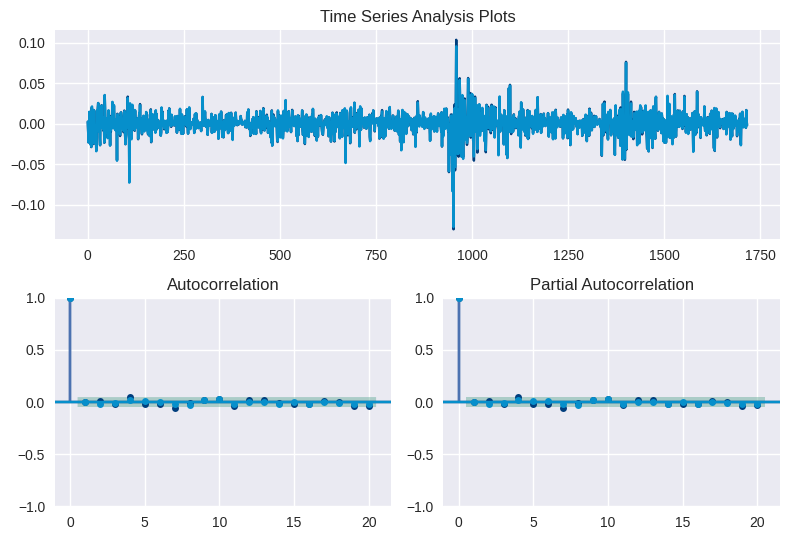

In [ ]:
TimeSeriesPlot(y=arma_11.resid, lags=20, y2=arma_55.resid)

In [ ]:
res = sm.tsa.arma_order_select_ic(np.diff(np.log(df)), ic=["aic", "bic"], trend="n")

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
res

{'aic':               0             1             2
 0 -10053.625736 -10053.069118 -10051.660082
 1 -10053.123208 -10051.473453 -10051.058335
 2 -10051.674504 -10051.654058 -10048.905928
 3 -10049.932937 -10047.961025 -10046.558126
 4 -10051.727103 -10049.762467 -10045.825281,
 'bic':               0             1             2
 0 -10048.177402 -10042.172450 -10035.315080
 1 -10042.226540 -10035.128451 -10029.264999
 2 -10035.329503 -10029.860722 -10021.664258
 3 -10028.139601 -10020.719356 -10013.868123
 4 -10024.485434 -10017.072464 -10007.686944,
 'aic_min_order': (0, 0),
 'bic_min_order': (0, 0)}

In [ ]:
res.aic_min_order

(0, 0)

In [ ]:
arma_best = ARIMA(np.diff(np.log(df)), order=(res.aic_min_order[0], 0, res.aic_min_order[1])).fit()
print(arma_best.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1717
Model:                          ARIMA   Log Likelihood                5028.196
Date:                Thu, 16 Nov 2023   AIC                         -10052.392
Time:                        10:06:47   BIC                         -10041.495
Sample:                             0   HQIC                        -10048.360
                               - 1717                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.843      0.399      -0.000       0.001
sigma2         0.0002   2.21e-06     75.835      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   1.46   Jarque-

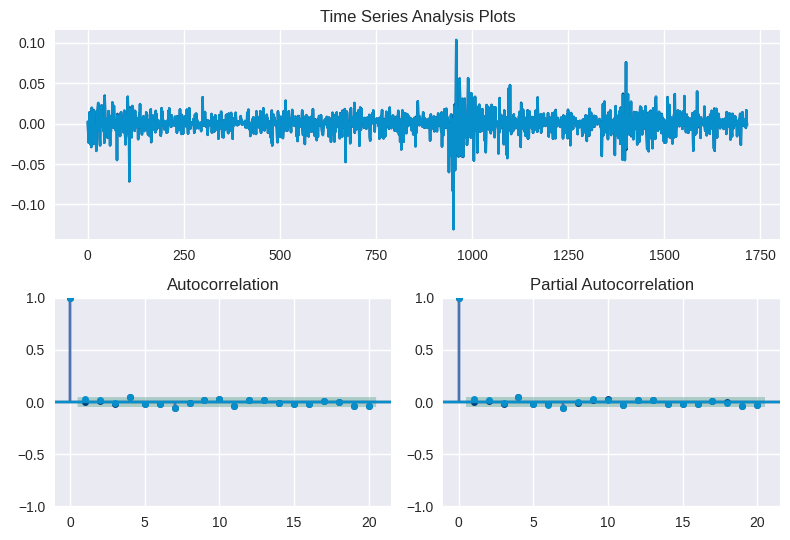

In [ ]:
TimeSeriesPlot(y=arma_11.resid, lags=20, y2=arma_best.resid)

## **Question 4**

Perform the same analysis above for the DAX.

# Stochastic Volatility - GARCH

In [ ]:
!pip3 install arch
from arch import arch_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 10.3 MB/s eta 0:00:00


In [ ]:
arima_resid = arma_best.resid

garch = arch_model(100*arima_resid, vol='GARCH', p=1, q=1, o=0, dist='StudentsT')
res_fit = garch.fit(update_freq=0, disp="off")
print(res_fit.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2552.36
Distribution:      Standardized Student's t   AIC:                           5114.72
Method:                  Maximum Likelihood   BIC:                           5141.96
                                              No. Observations:                 1717
Date:                      Thu, Nov 16 2023   Df Residuals:                     1716
Time:                              10:39:30   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

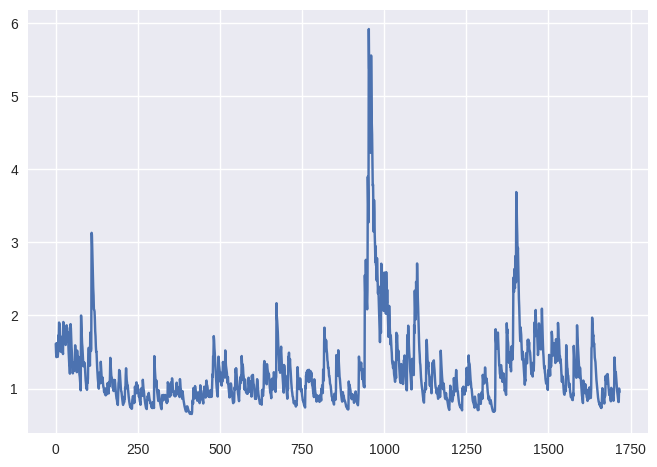

In [ ]:
plt.plot(res_fit.conditional_volatility)

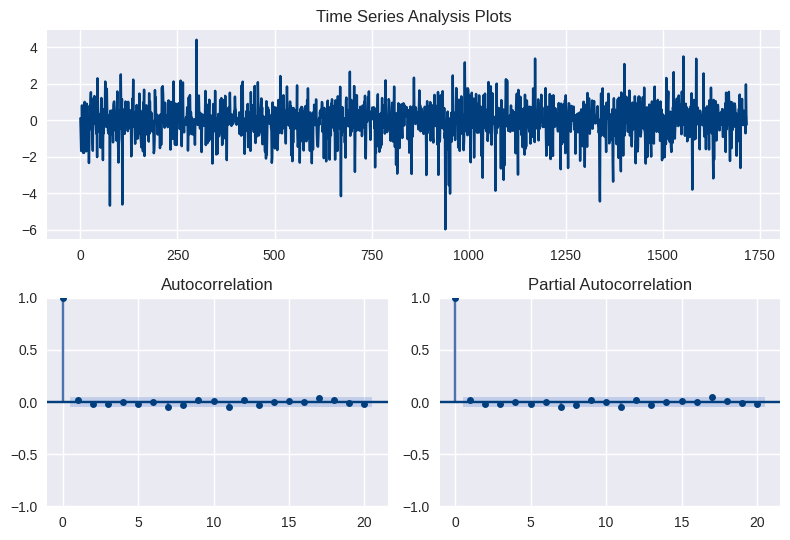

In [ ]:
std_resid = pd.Series(res_fit.resid / res_fit.conditional_volatility)

TimeSeriesPlot(std_resid, lags=20)

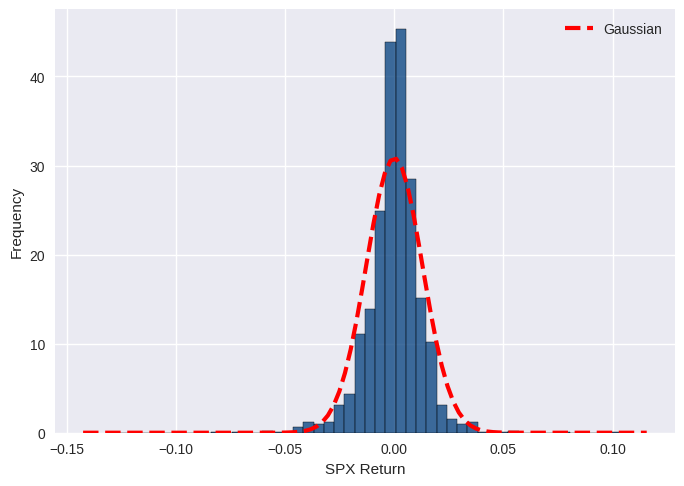

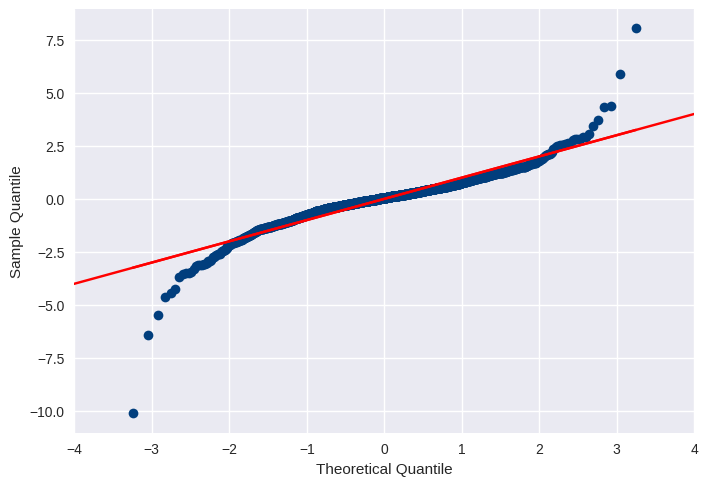

In [ ]:
HistQQplot(arima_resid)

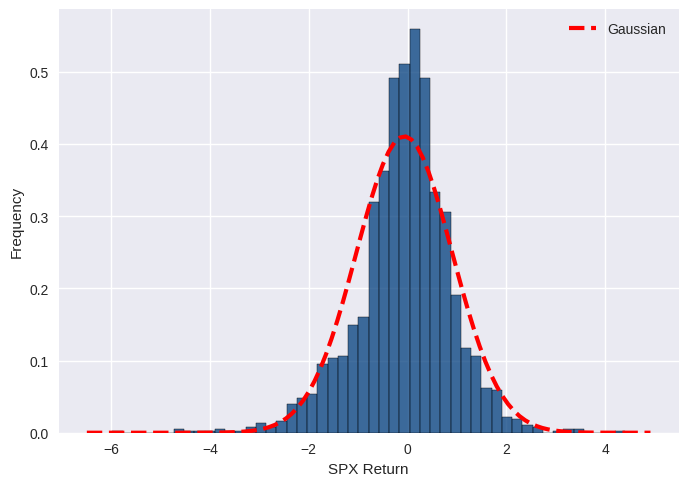

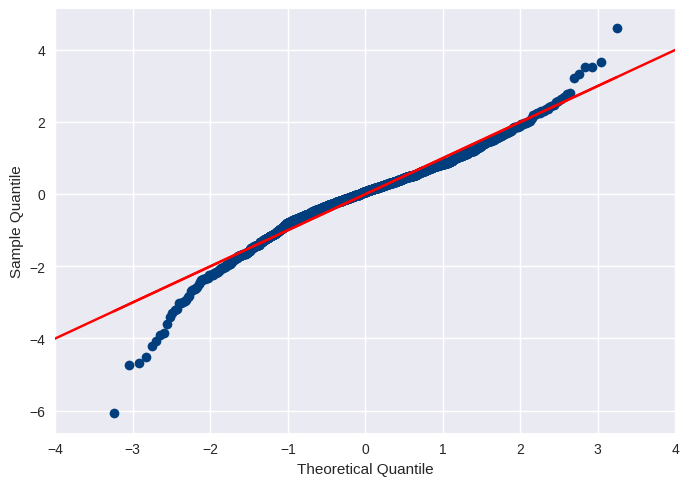

In [ ]:
HistQQplot(std_resid)

## **Question 5**

Perform the same analysis above for the DAX.



# Value at Risk Using GARCH

In [ ]:
res

{'aic':               0             1             2
 0 -10065.047242 -10064.024890 -10072.339894
 1 -10064.191558 -10073.108729 -10080.181804
 2 -10073.699244 -10080.156049 -10078.121821
 3 -10076.634835 -10074.593207 -10078.108093
 4 -10076.465402 -10074.445113 -10074.300366,
 'bic':               0             1             2
 0 -10059.598908 -10053.128222 -10055.994892
 1 -10053.294890 -10056.763727 -10058.388469
 2 -10057.354242 -10058.362713 -10050.880152
 3 -10054.841499 -10047.351537 -10045.418090
 4 -10049.223733 -10041.755110 -10036.162029,
 'aic_min_order': (1, 2),
 'bic_min_order': (0, 0)}

In [ ]:
import datetime as dt

<ipython-input-33-2468780327c2>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


Number of 5% exceedance: 0.06655290102389079


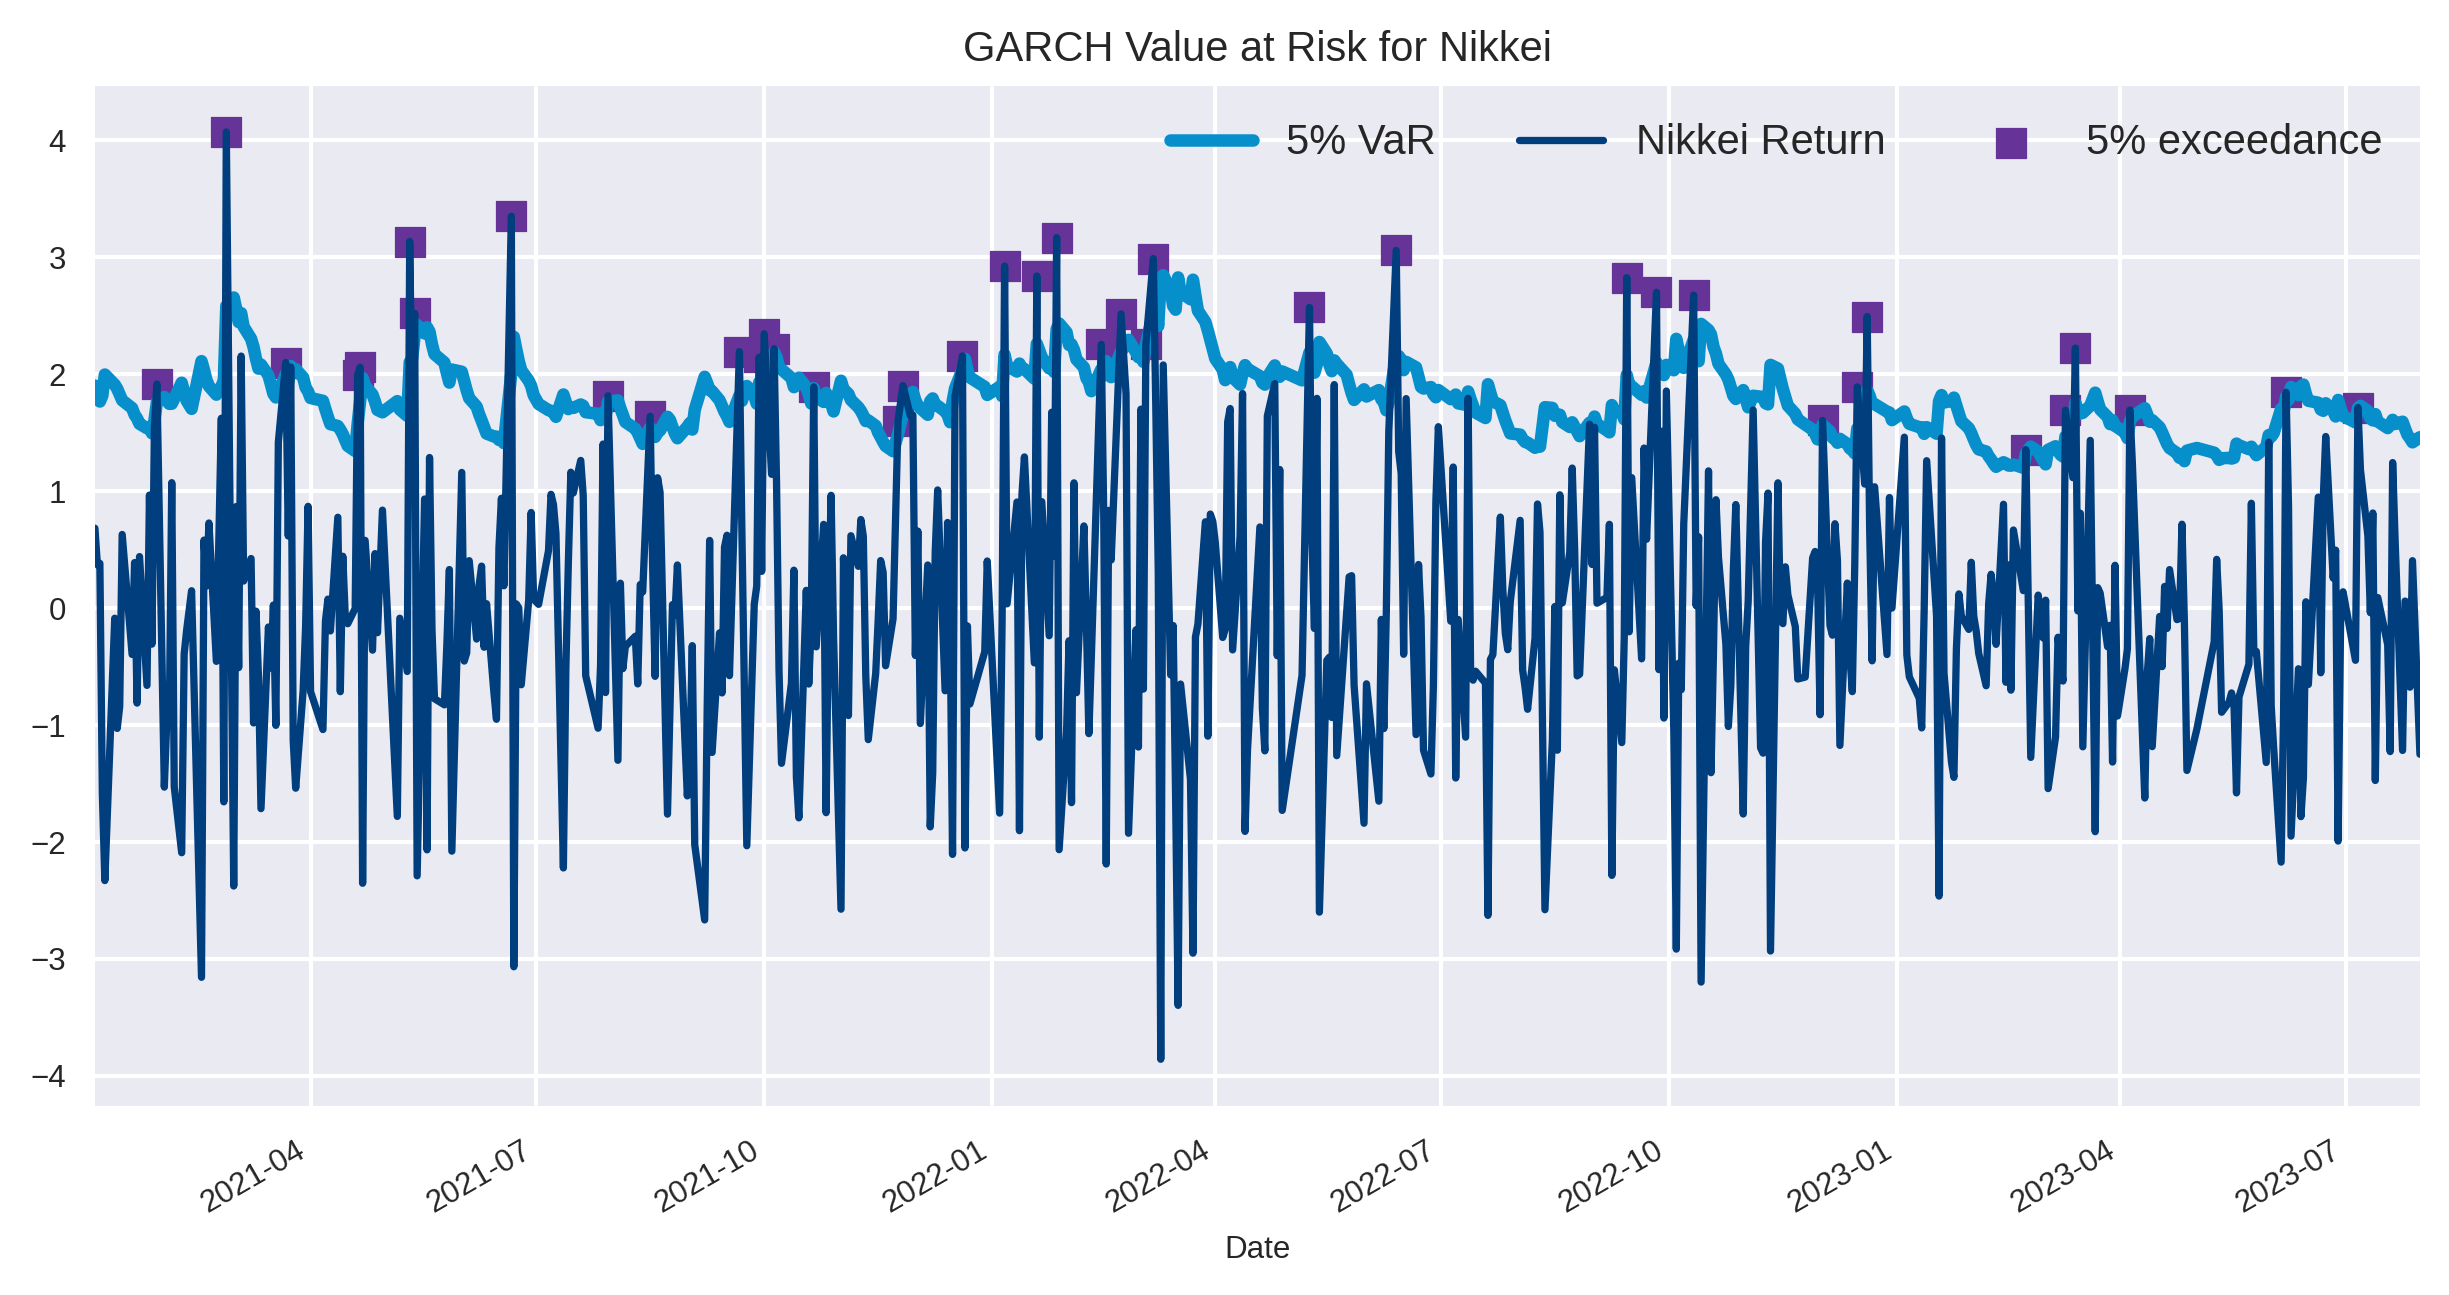

In [ ]:
returns = pd.Series(100 * np.diff(np.log(df)))
returns.index = df.index[1:]

am = arch_model(returns, vol="Garch", p=1, q=1, dist='StudentsT')
res = am.fit(disp="off", last_obs=dt.datetime(2020,12,31))

forecasts = res.forecast(start=dt.datetime(2021,1,1), reindex=False)
cond_mean = forecasts.mean["2021":]
cond_var = forecasts.variance["2021":]
q = am.distribution.ppf([0.05], res.params[-1:])

value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q
value_at_risk = pd.DataFrame(value_at_risk, columns=["5% VaR"], index=cond_var.index)

with plt.rc_context(plot_params):
  ax = value_at_risk.plot(figsize=(10,5),legend=False,color=color_light_blue)

  rets = returns["2021":].copy()
  rets.name = "Nikkei Return"
  (-rets).plot(color=color_dark_blue)

  for line in ax.get_lines():
      if line.get_label() == "5% VaR":
          line.set_linewidth(3)

  c = []
  ret_index_var = []
  ret_var = []

  five = 0

  for idx in value_at_risk.index:
      if rets[idx] <= -value_at_risk.loc[idx, "5% VaR"]:
          five = five + 1
          ret_index_var.append(idx)
          ret_var.append(-rets.loc[idx])

  ax.scatter(
      ret_index_var,
      ret_var,
      marker="s",
      c=purple,
      label="5% exceedance",
  )

  ax.set_title("GARCH Value at Risk for Nikkei")
  leg = ax.legend(frameon=False, ncol=3)
  xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])

  print("Number of 5% exceedance: {}".format(five/len(value_at_risk.index)))

## **Question 6**

Perform the same analysis above for the DAX and quantile 10%. Choose the best model that we have selected in Question 5.